## Import libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn.metrics import classification_report,confusion_matrix

## Read data

In [2]:
data = pd.read_csv('E:/datasets/RF_dataset.csv')

## Summerized imformation of data

In [3]:
data.shape

(768, 9)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [5]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [6]:
data.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [7]:
data.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

## EDA

In [8]:
np.unique(data['Outcome'], return_counts = True)

(array([0, 1], dtype=int64), array([500, 268], dtype=int64))

<AxesSubplot:xlabel='Outcome', ylabel='count'>

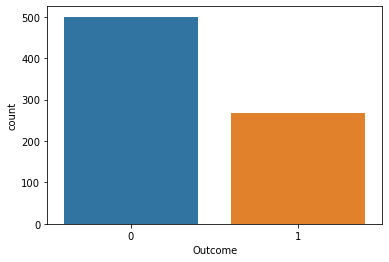

In [9]:
sns.countplot(x =data['Outcome'] )

<AxesSubplot:xlabel='Glucose', ylabel='Count'>

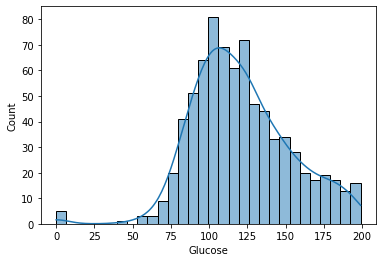

In [10]:
sns.histplot(data['Glucose'] , bins= 30 ,kde=True)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Glucose'>

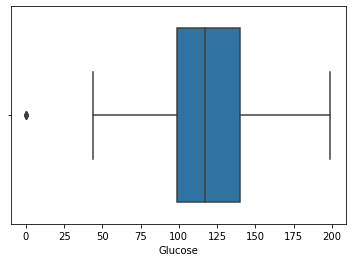

In [11]:
sns.boxplot(data['Glucose'])

In [12]:
data[data['Glucose']<50]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
62,5,44,62,0,0,25.0,0.587,36,0
75,1,0,48,20,0,24.7,0.140,22,0
182,1,0,74,20,23,27.7,0.299,21,0
342,1,0,68,35,0,32.0,0.389,22,0
349,5,0,80,32,0,41.0,0.346,37,1
502,6,0,68,41,0,39.0,0.727,41,1


In [13]:
data.drop(data[data['Glucose']<50].index ,inplace=True)

<AxesSubplot:xlabel='BloodPressure', ylabel='Count'>

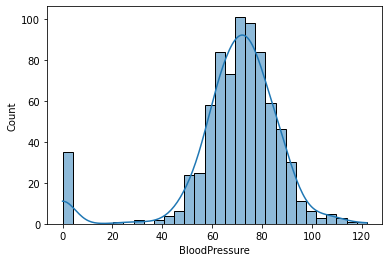

In [14]:
sns.histplot(data['BloodPressure'] , bins=30 , kde=True)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='BloodPressure'>

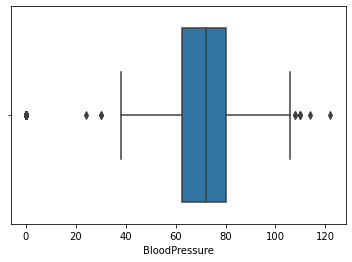

In [15]:
sns.boxplot(data['BloodPressure'])

In [16]:
data[data['BloodPressure']==0]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
7,10,115,0,0,0,35.3,0.134,29,0
15,7,100,0,0,0,30.0,0.484,32,1
49,7,105,0,0,0,0.0,0.305,24,0
60,2,84,0,0,0,0.0,0.304,21,0
78,0,131,0,0,0,43.2,0.270,26,1
81,2,74,0,0,0,0.0,0.102,22,0
172,2,87,0,23,0,28.9,0.773,25,0
193,11,135,0,0,0,52.3,0.578,40,1
222,7,119,0,0,0,25.2,0.209,37,0
261,3,141,0,0,0,30.0,0.761,27,1


In [17]:
data['BloodPressure'].describe()

count    762.000000
mean      69.124672
std       19.410266
min        0.000000
25%       62.500000
50%       72.000000
75%       80.000000
max      122.000000
Name: BloodPressure, dtype: float64

In [18]:
IQR_B = 80 - 62.5
upper_B = 80 +(1.5 *IQR_B)
lower_B = 62.5 - (1.5*IQR_B)

In [19]:
data[data['BloodPressure'] > upper_B]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
43,9,171,110,24,240,45.4,0.721,54,1
84,5,137,108,0,0,48.8,0.227,37,1
106,1,96,122,0,0,22.4,0.207,27,0
177,0,129,110,46,130,67.1,0.319,26,1
362,5,103,108,37,0,39.2,0.305,65,0
549,4,189,110,31,0,28.5,0.680,37,0
691,13,158,114,0,0,42.3,0.257,44,1


In [20]:
data[(data['BloodPressure'] < lower_B) & (data['BloodPressure'] != 0)]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
18,1,103,30,38,83,43.3,0.183,33,0
125,1,88,30,42,99,55.0,0.496,26,1
597,1,89,24,19,25,27.8,0.559,21,0


In [21]:
Blod_mean = data[data['BloodPressure'] != 0]
Blod_mean = Blod_mean['BloodPressure'].mean()

In [22]:
data.replace({'BloodPressure': 0 } , Blod_mean , inplace=True)

<AxesSubplot:xlabel='SkinThickness', ylabel='Count'>

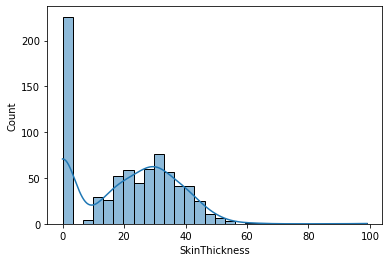

In [23]:
sns.histplot(data['SkinThickness'] , bins=30 , kde=True)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='SkinThickness'>

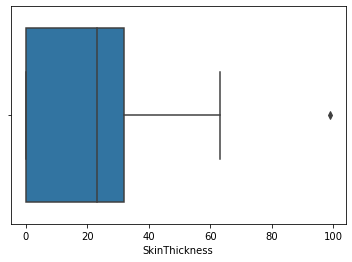

In [24]:
sns.boxplot(data['SkinThickness'])

In [25]:
Skin_mean = data[data['SkinThickness'] != 0]
Skin_mean = Skin_mean['SkinThickness'].mean()

In [26]:
data.replace({'SkinThickness': 0}, Skin_mean , inplace=True)

<AxesSubplot:xlabel='Insulin', ylabel='Count'>

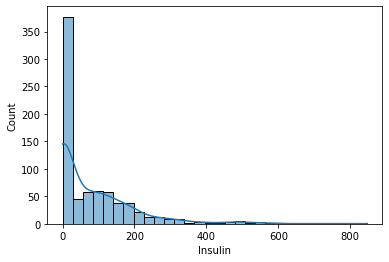

In [27]:
sns.histplot(data['Insulin'], bins=30, kde=True)

In [28]:
data[data['Insulin']==0]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72.000000,35.000000,0,33.6,0.627,50,1
1,1,85,66.000000,29.000000,0,26.6,0.351,31,0
2,8,183,64.000000,29.149254,0,23.3,0.672,32,1
5,5,116,74.000000,29.149254,0,25.6,0.201,30,0
7,10,115,72.452545,29.149254,0,35.3,0.134,29,0
...,...,...,...,...,...,...,...,...,...
761,9,170,74.000000,31.000000,0,44.0,0.403,43,1
762,9,89,62.000000,29.149254,0,22.5,0.142,33,0
764,2,122,70.000000,27.000000,0,36.8,0.340,27,0
766,1,126,60.000000,29.149254,0,30.1,0.349,47,1


In [29]:
Ins_mean = data[data['Insulin'] != 0]
Ins_mean = Ins_mean['Insulin'].mean()

In [30]:
data.replace({'Insulin':0},Ins_mean, inplace=True)

<AxesSubplot:xlabel='BMI', ylabel='Count'>

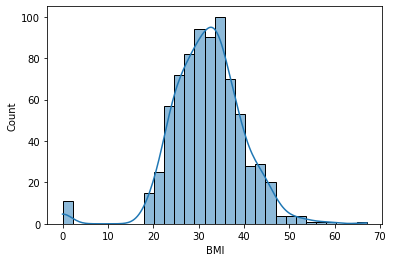

In [31]:
sns.histplot(data['BMI'], bins = 30 , kde=True)

In [32]:
data[data['BMI'] == 0]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
9,8,125,96.000000,29.149254,155.885496,0.0,0.232,54,1
49,7,105,72.452545,29.149254,155.885496,0.0,0.305,24,0
60,2,84,72.452545,29.149254,155.885496,0.0,0.304,21,0
81,2,74,72.452545,29.149254,155.885496,0.0,0.102,22,0
145,0,102,75.000000,23.000000,155.885496,0.0,0.572,21,0
371,0,118,64.000000,23.000000,89.000000,0.0,1.731,21,0
426,0,94,72.452545,29.149254,155.885496,0.0,0.256,25,0
494,3,80,72.452545,29.149254,155.885496,0.0,0.174,22,0
522,6,114,72.452545,29.149254,155.885496,0.0,0.189,26,0
684,5,136,82.000000,29.149254,155.885496,0.0,0.640,69,0


In [33]:
bmi_mean = data[data['BMI'] != 0]
bmi_mean = bmi_mean['BMI'].mean()

In [34]:
data.replace({'BMI': 0}, bmi_mean, inplace=True )

<AxesSubplot:xlabel='DiabetesPedigreeFunction', ylabel='Count'>

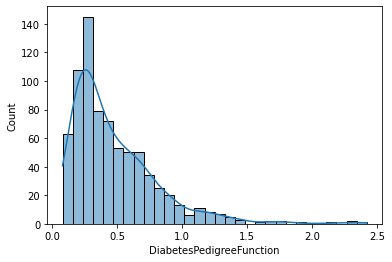

In [35]:
sns.histplot(data['DiabetesPedigreeFunction'], bins=30 , kde=True)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='DiabetesPedigreeFunction'>

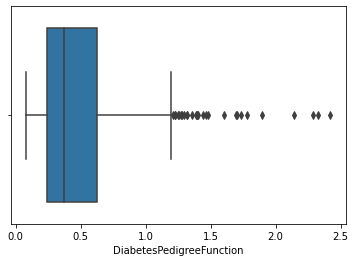

In [36]:
sns.boxplot(data['DiabetesPedigreeFunction'])

In [37]:
data['DiabetesPedigreeFunction'].describe()

count    762.000000
mean       0.472327
std        0.332155
min        0.078000
25%        0.243250
50%        0.372500
75%        0.626750
max        2.420000
Name: DiabetesPedigreeFunction, dtype: float64

In [38]:
IQR_df = 0.626750 - 0.243250
upper_df = 0.626750 + (1.5*IQR_df)
lower_df = 0.626750 - (1.5*IQR_df)
print(upper_df , lower_df)

1.202 0.05149999999999999


In [39]:
data[(data['DiabetesPedigreeFunction']> upper_df) | (data['DiabetesPedigreeFunction']< lower_df) ]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
4,0,137,40.0,35.000000,168.000000,43.100000,2.288,33,1
12,10,139,80.0,29.149254,155.885496,27.100000,1.441,57,0
39,4,111,72.0,47.000000,207.000000,37.100000,1.390,56,1
45,0,180,66.0,39.000000,155.885496,42.000000,1.893,25,1
58,0,146,82.0,29.149254,155.885496,40.500000,1.781,44,0
100,1,163,72.0,29.149254,155.885496,39.000000,1.222,33,1
147,2,106,64.0,35.000000,119.000000,30.500000,1.400,34,0
187,1,128,98.0,41.000000,58.000000,32.000000,1.321,33,1
218,5,85,74.0,22.000000,155.885496,29.000000,1.224,32,1
228,4,197,70.0,39.000000,744.000000,36.700000,2.329,31,0


In [40]:
df_drop = data[(data['DiabetesPedigreeFunction']> upper_df) | (data['DiabetesPedigreeFunction']< lower_df) ].index

In [41]:
data.drop(df_drop , axis=0 , inplace=True)

<AxesSubplot:xlabel='Age', ylabel='Count'>

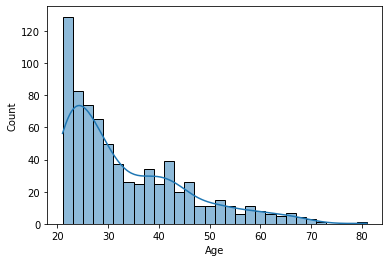

In [42]:
sns.histplot(data['Age'], bins=30 , kde=True)

<AxesSubplot:xlabel='Pregnancies', ylabel='count'>

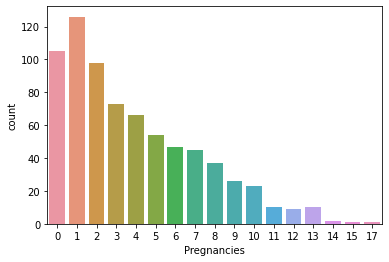

In [43]:
sns.countplot(data=data , x='Pregnancies',)

In [44]:
data[data['Pregnancies']>=11]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
24,11,143,94.000000,33.000000,146.000000,36.6,0.254,51,1
28,13,145,82.000000,19.000000,110.000000,22.2,0.245,57,0
36,11,138,76.000000,29.149254,155.885496,33.2,0.420,35,0
72,13,126,90.000000,29.149254,155.885496,43.4,0.583,42,1
86,13,106,72.000000,54.000000,155.885496,36.6,0.178,45,0
88,15,136,70.000000,32.000000,110.000000,37.1,0.153,43,1
159,17,163,72.000000,41.000000,114.000000,40.9,0.817,47,1
193,11,135,72.452545,29.149254,155.885496,52.3,0.578,40,1
215,12,151,70.000000,40.000000,271.000000,41.8,0.742,38,1
254,12,92,62.000000,7.000000,258.000000,27.6,0.926,44,1


##Correlations

In [45]:
data.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.138258,0.204328,0.102406,0.054543,0.039972,-0.001059,0.534979,0.232352
Glucose,0.138258,1.000000,0.212497,0.174699,0.419517,0.205114,0.091130,0.279715,0.501472
BloodPressure,0.204328,0.212497,1.000000,0.191643,0.079085,0.285349,0.013652,0.323433,0.164589
SkinThickness,0.102406,0.174699,0.191643,1.000000,0.153114,0.525391,0.064274,0.138211,0.201520
Insulin,0.054543,0.419517,0.079085,0.153114,1.000000,0.173749,0.056746,0.146536,0.230059
BMI,0.039972,0.205114,0.285349,0.525391,0.173749,1.000000,0.129650,0.031030,0.299371
DiabetesPedigreeFunction,-0.001059,0.091130,0.013652,0.064274,0.056746,0.129650,1.000000,0.048146,0.158845
Age,0.534979,0.279715,0.323433,0.138211,0.146536,0.031030,0.048146,1.000000,0.245039
Outcome,0.232352,0.501472,0.164589,0.201520,0.230059,0.299371,0.158845,0.245039,1.000000


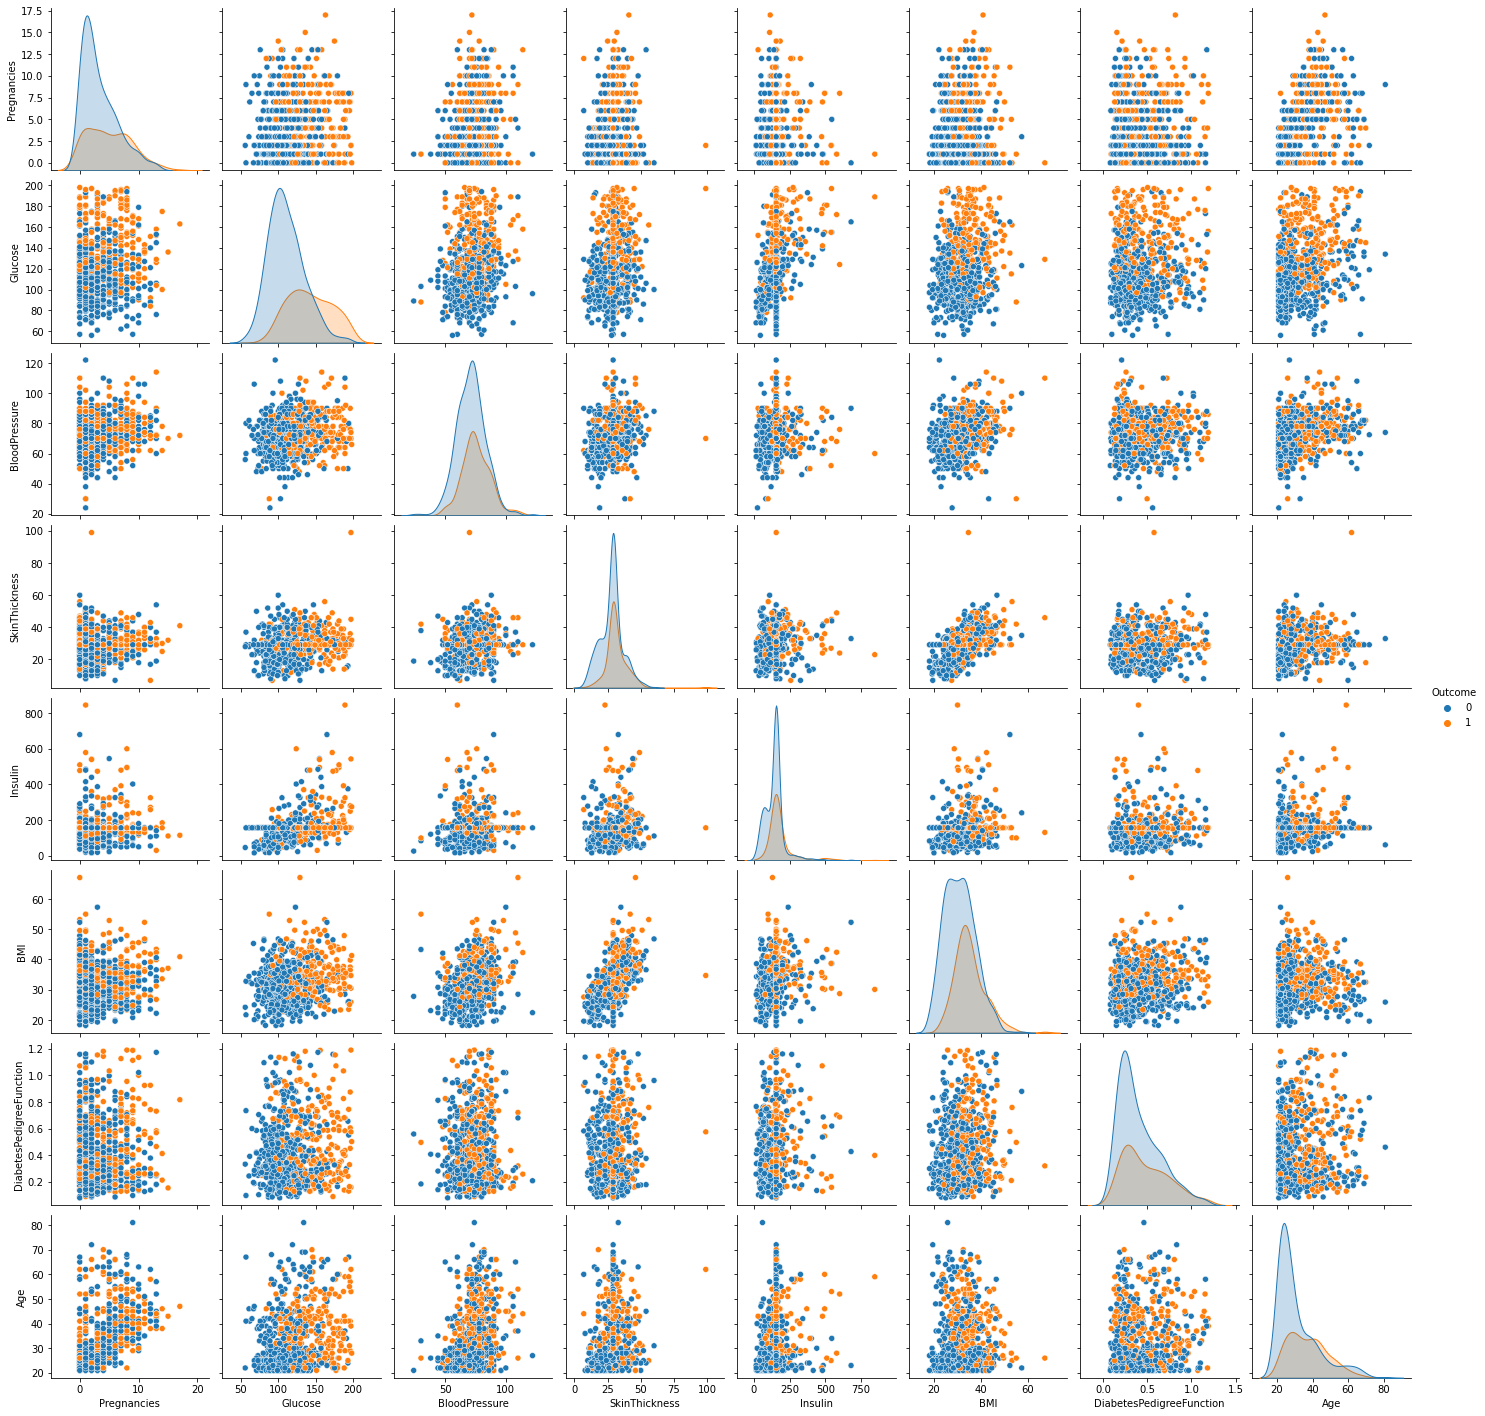

In [46]:
sns.pairplot(data , hue='Outcome')

In [47]:
data.corr()['Outcome']

Pregnancies                 0.232352
Glucose                     0.501472
BloodPressure               0.164589
SkinThickness               0.201520
Insulin                     0.230059
BMI                         0.299371
DiabetesPedigreeFunction    0.158845
Age                         0.245039
Outcome                     1.000000
Name: Outcome, dtype: float64

## Split target variable from the others

In [48]:
x = data.drop('Outcome',axis=1)
y = data['Outcome']

## Scaling

In [49]:
scale = MinMaxScaler()
X = scale.fit_transform(x)

## Split data to train and test

In [50]:
X_train , X_test , y_train , y_test = train_test_split(X, y , test_size= 0.2 , random_state= 123)

## Fit Model

In [51]:
clf = RandomForestClassifier()
clf.fit(X_train , y_train)

RandomForestClassifier()

## predicted values

In [52]:
y_pred = clf.predict(X_test)

## Evaluation

In [53]:
print('accuracy:' , metrics.accuracy_score(y_test , y_pred))

accuracy: 0.7755102040816326


In [54]:
print(classification_report(y_test , y_pred))

              precision    recall  f1-score   support

           0       0.80      0.88      0.84        96
           1       0.71      0.59      0.65        51

    accuracy                           0.78       147
   macro avg       0.76      0.73      0.74       147
weighted avg       0.77      0.78      0.77       147

